In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
card=pd.read_csv('campus card_swipes.csv')


In [ ]:
cctv=pd.read_csv('cctv_frames.csv')


In [ ]:
lab=pd.read_csv('lab_bookings.csv')


In [ ]:
lib=pd.read_csv('library_checkouts.csv')


In [ ]:
profile=pd.read_csv('student or staff profiles.csv')


In [ ]:
wifi=pd.read_csv('wifi_associations_logs.csv')

In [ ]:
profile.head()

,entity_id,name,role,email,department,student_id,staff_id,card_id,device_hash,face_id
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,S39256,NaN,C3286,DH6d0bd80c8f8e,F100000
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,S14165,NaN,C1488,DH75af13047587,F100001
2,E100002,Neha Singh,student,user2@campus.edu,Admin,S13478,NaN,C4257,DH7a5f80cb6e8d,F100002
3,E100003,Ishaan Desai,student,user3@campus.edu,Admin,S46463,NaN,C1106,DH3f7f51a6e78d,F100003
4,E100004,Rohan Desai,student,user4@campus.edu,MECH,S38221,NaN,C6514,DH64dfe3d9327e,F100004


In [ ]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    7000 non-null   object
 1   name         7000 non-null   object
 2   role         7000 non-null   object
 3   email        7000 non-null   object
 4   department   7000 non-null   object
 5   student_id   5601 non-null   object
 6   staff_id     1399 non-null   object
 7   card_id      7000 non-null   object
 8   device_hash  7000 non-null   object
 9   face_id      5000 non-null   object
dtypes: object(10)
memory usage: 547.0+ KB


In [ ]:
profile['device_hash'].duplicated().sum()

np.int64(0)

In [ ]:
wifi.head()

,device_hash,ap_id,timestamp
0,DH6034d82be28b,AP_LIB_1,9/16/2025 19:22
1,DHbb3a8ccad22b,AP_ENG_5,9/24/2025 5:50
2,DH791defaaf163,AP_AUD_3,9/4/2025 22:48
3,DH19babb55cc1f,AP_CAF_3,9/24/2025 3:27
4,DH7fa70efe3b51,AP_ENG_1,8/27/2025 23:23


In [ ]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   device_hash  8000 non-null   object
 1   ap_id        8000 non-null   object
 2   timestamp    8000 non-null   object
dtypes: object(3)
memory usage: 187.6+ KB


In [ ]:
wifi['device_hash'].duplicated().sum()

np.int64(3233)

In [ ]:
profile['person_id'] = profile['student_id'].combine_first(profile['staff_id'])

In [ ]:
merged_df = pd.merge(profile, wifi, on='device_hash', how='inner')

In [ ]:
merged_df.head()

,entity_id,name,role,email,department,student_id,staff_id,card_id,device_hash,face_id,person_id,ap_id,timestamp
0,E100001,Neha Kumar,student,user1@campus.edu,Physics,S14165,NaN,C1488,DH75af13047587,F100001,S14165,AP_AUD_3,9/7/2025 3:06
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,S14165,NaN,C1488,DH75af13047587,F100001,S14165,AP_LAB_2,9/8/2025 12:37
2,E100001,Neha Kumar,student,user1@campus.edu,Physics,S14165,NaN,C1488,DH75af13047587,F100001,S14165,AP_ENG_3,8/27/2025 23:46
3,E100002,Neha Singh,student,user2@campus.edu,Admin,S13478,NaN,C4257,DH7a5f80cb6e8d,F100002,S13478,AP_AUD_5,9/12/2025 23:08
4,E100003,Ishaan Desai,student,user3@campus.edu,Admin,S46463,NaN,C1106,DH3f7f51a6e78d,F100003,S46463,AP_LIB_4,9/24/2025 1:05


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    8000 non-null   object
 1   name         8000 non-null   object
 2   role         8000 non-null   object
 3   email        8000 non-null   object
 4   department   8000 non-null   object
 5   student_id   6438 non-null   object
 6   staff_id     1562 non-null   object
 7   card_id      8000 non-null   object
 8   device_hash  8000 non-null   object
 9   face_id      5789 non-null   object
 10  person_id    8000 non-null   object
 11  ap_id        8000 non-null   object
 12  timestamp    8000 non-null   object
dtypes: object(13)
memory usage: 812.6+ KB


In [ ]:
import pandas as pd

profile = profile.copy()

# Step 1: Find duplicated student_ids (excluding nulls)
duplicated_ids = profile.loc[
    profile['student_id'].notna() & profile['student_id'].duplicated(keep=False),
    'student_id'
].unique()

# Step 2: Create a counter for each duplicated student_id
counters = {sid: 0 for sid in duplicated_ids}

# Step 3: Function to assign new IDs
def assign_unique_id(sid):
    if pd.isna(sid):  # keep NaN as is
        return sid
    if sid in counters:
        if counters[sid] == 0:
            counters[sid] += 1
            return sid  # keep original for first occurrence
        else:
            new_id = f"{sid}_{counters[sid]}"
            counters[sid] += 1
            return new_id
    else:
        return sid  # leave non-duplicated IDs as is

# Step 4: Apply to create a new column
profile['student_id_unique'] = profile['student_id'].apply(assign_unique_id)

# Check result
print(profile[profile['student_id'].isin(duplicated_ids)].head(10))


    entity_id             name     role               email department  \
22    E100022  Siddharth Kumar  student   user22@campus.edu       MECH   
26    E100026    Ishaan Sharma  student   user26@campus.edu      Admin   
42    E100042       Sana Kumar  student   user42@campus.edu        BIO   
53    E100053       Rohan Iyer  student   user53@campus.edu        ECE   
77    E100077      Divya Gupta  student   user77@campus.edu      CIVIL   
96    E100096       Neha Desai  student   user96@campus.edu  Chemistry   
106   E100106         Sana Rao  student  user106@campus.edu      Admin   
132   E100132      Rohan Mehta  student  user132@campus.edu      Admin   
165   E100165       Aarav Iyer  student  user165@campus.edu    Physics   
176   E100176       Aarav Iyer  student  user176@campus.edu        CSE   

    student_id staff_id card_id     device_hash  face_id person_id  \
22      S59009      NaN   C3646  DH3384ceae5090  F100022    S59009   
26      S65461      NaN   C4470  DH1df16398b3

In [ ]:
duplicated_ids = profile.loc[
    profile['student_id_unique'].notna() & profile['student_id_unique'].duplicated(keep=False),
    'student_id_unique'
].unique()

print(len(duplicated_ids))

0


In [ ]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   entity_id          7000 non-null   object
 1   name               7000 non-null   object
 2   role               7000 non-null   object
 3   email              7000 non-null   object
 4   department         7000 non-null   object
 5   student_id         5601 non-null   object
 6   staff_id           1399 non-null   object
 7   card_id            7000 non-null   object
 8   device_hash        7000 non-null   object
 9   face_id            5000 non-null   object
 10  person_id          7000 non-null   object
 11  student_id_unique  5601 non-null   object
dtypes: object(12)
memory usage: 656.4+ KB


In [ ]:
profile.head()

,entity_id,name,role,email,department,student_id,staff_id,card_id,device_hash,face_id,person_id,student_id_unique
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,S39256,NaN,C3286,DH6d0bd80c8f8e,F100000,S39256,S39256
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,S14165,NaN,C1488,DH75af13047587,F100001,S14165,S14165
2,E100002,Neha Singh,student,user2@campus.edu,Admin,S13478,NaN,C4257,DH7a5f80cb6e8d,F100002,S13478,S13478
3,E100003,Ishaan Desai,student,user3@campus.edu,Admin,S46463,NaN,C1106,DH3f7f51a6e78d,F100003,S46463,S46463
4,E100004,Rohan Desai,student,user4@campus.edu,MECH,S38221,NaN,C6514,DH64dfe3d9327e,F100004,S38221,S38221


In [ ]:
import pandas as pd

profile = profile.copy()

# Step 1: Find duplicated student_ids (excluding nulls)
duplicated_ids = profile.loc[
    profile['staff_id'].notna() & profile['staff_id'].duplicated(keep=False),
    'staff_id'
].unique()

# Step 2: Create a counter for each duplicated student_id
counters = {sid: 0 for sid in duplicated_ids}

# Step 3: Function to assign new IDs
def assign_unique_id(sid):
    if pd.isna(sid):  # keep NaN as is
        return sid
    if sid in counters:
        if counters[sid] == 0:
            counters[sid] += 1
            return sid  # keep original for first occurrence
        else:
            new_id = f"{sid}_{counters[sid]}"
            counters[sid] += 1
            return new_id
    else:
        return sid  # leave non-duplicated IDs as is

# Step 4: Apply to create a new column
profile['staff_id_unique'] = profile['staff_id'].apply(assign_unique_id)

# Check result
print(profile[profile['staff_id'].isin(duplicated_ids)].head(10))


    entity_id          name     role               email department  \
60    E100060  Ananya Mehta    staff   user60@campus.edu      CIVIL   
65    E100065   Ananya Iyer    staff   user65@campus.edu      CIVIL   
71    E100071   Aarav Kumar    staff   user71@campus.edu        BIO   
111   E100111  Ananya Singh    staff  user111@campus.edu        EEE   
224   E100224    Priya Iyer    staff  user224@campus.edu        EEE   
259   E100259  Ananya Kumar    staff  user259@campus.edu        EEE   
261   E100261   Divya Patel  faculty  user261@campus.edu        CSE   
276   E100276  Divya Sharma    staff  user276@campus.edu  Chemistry   
315   E100315  Priya Sharma  faculty  user315@campus.edu      CIVIL   
350   E100350  Divya Sharma  faculty  user350@campus.edu        CSE   

    student_id staff_id card_id     device_hash  face_id person_id  \
60         NaN    T7463   C2684  DH6722fc04a0dc  F100060     T7463   
65         NaN    T2193   C4164  DH133819a8fc92  F100065     T2193   
71      

In [ ]:
profile.head()

,entity_id,name,role,email,department,student_id,staff_id,card_id,device_hash,face_id,person_id,student_id_unique,staff_id_unique
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,S39256,NaN,C3286,DH6d0bd80c8f8e,F100000,S39256,S39256,NaN
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,S14165,NaN,C1488,DH75af13047587,F100001,S14165,S14165,NaN
2,E100002,Neha Singh,student,user2@campus.edu,Admin,S13478,NaN,C4257,DH7a5f80cb6e8d,F100002,S13478,S13478,NaN
3,E100003,Ishaan Desai,student,user3@campus.edu,Admin,S46463,NaN,C1106,DH3f7f51a6e78d,F100003,S46463,S46463,NaN
4,E100004,Rohan Desai,student,user4@campus.edu,MECH,S38221,NaN,C6514,DH64dfe3d9327e,F100004,S38221,S38221,NaN


In [ ]:
profile.drop(['student_id', 'staff_id'], axis=1, inplace=True)

In [ ]:
profile['person_id'] = profile['student_id_unique'].fillna(profile['staff_id_unique'])

In [ ]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   entity_id          7000 non-null   object
 1   name               7000 non-null   object
 2   role               7000 non-null   object
 3   email              7000 non-null   object
 4   department         7000 non-null   object
 5   card_id            7000 non-null   object
 6   device_hash        7000 non-null   object
 7   face_id            5000 non-null   object
 8   person_id          7000 non-null   object
 9   student_id_unique  5601 non-null   object
 10  staff_id_unique    1399 non-null   object
dtypes: object(11)
memory usage: 601.7+ KB


In [ ]:
profile.drop(['student_id_unique', 'staff_id_unique'], axis=1, inplace=True)

In [ ]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    7000 non-null   object
 1   name         7000 non-null   object
 2   role         7000 non-null   object
 3   email        7000 non-null   object
 4   department   7000 non-null   object
 5   card_id      7000 non-null   object
 6   device_hash  7000 non-null   object
 7   face_id      5000 non-null   object
 8   person_id    7000 non-null   object
dtypes: object(9)
memory usage: 492.3+ KB


In [ ]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   device_hash  8000 non-null   object
 1   ap_id        8000 non-null   object
 2   timestamp    8000 non-null   object
dtypes: object(3)
memory usage: 187.6+ KB


In [ ]:
wifi.duplicated().sum()

np.int64(0)

In [ ]:
wifipro = pd.merge(profile, wifi, on='device_hash', how='left')

In [ ]:
wifipro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10233 entries, 0 to 10232
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    10233 non-null  object
 1   name         10233 non-null  object
 2   role         10233 non-null  object
 3   email        10233 non-null  object
 4   department   10233 non-null  object
 5   card_id      10233 non-null  object
 6   device_hash  10233 non-null  object
 7   face_id      7372 non-null   object
 8   person_id    10233 non-null  object
 9   ap_id        8000 non-null   object
 10  timestamp    8000 non-null   object
dtypes: object(11)
memory usage: 879.5+ KB


In [ ]:
wifipro.head()

,entity_id,name,role,email,department,card_id,device_hash,face_id,person_id,ap_id,timestamp
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,C3286,DH6d0bd80c8f8e,F100000,S39256,NaN,NaN
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_AUD_3,9/7/2025 3:06
2,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_LAB_2,9/8/2025 12:37
3,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_ENG_3,8/27/2025 23:46
4,E100002,Neha Singh,student,user2@campus.edu,Admin,C4257,DH7a5f80cb6e8d,F100002,S13478,AP_AUD_5,9/12/2025 23:08


In [ ]:
ap_null_timestamp_exists = wifipro[wifipro['ap_id'].isna() & wifipro['timestamp'].notna()]
print(ap_null_timestamp_exists)

Empty DataFrame
Columns: [entity_id, name, role, email, department, card_id, device_hash, face_id, person_id, ap_id, timestamp]
Index: []


In [ ]:
timestamp_null_ap_exists = wifipro[wifipro['timestamp'].isna() & wifipro['ap_id'].notna()]
print(timestamp_null_ap_exists)

Empty DataFrame
Columns: [entity_id, name, role, email, department, card_id, device_hash, face_id, person_id, ap_id, timestamp]
Index: []


In [ ]:
wifipro['ap_id'].isnull().sum()

np.int64(2233)

In [ ]:
wifipro['timestamp'].isnull().sum()

np.int64(2233)

In [ ]:
wifipro.shape

(10233, 11)

In [ ]:
lib.head()

,checkout_id,entity_id,book_id,timestamp
0,LC200000,E100646,BK2549,2025-08-27 06:57:14
1,LC200001,E105470,BK2116,2025-09-21 02:36:03
2,LC200002,E102616,BK2404,2025-09-12 23:46:25
3,LC200003,E103231,BK1049,2025-09-09 08:41:54
4,LC200004,E106413,BK2903,2025-09-08 11:56:07


In [ ]:
lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   checkout_id  7000 non-null   object
 1   entity_id    7000 non-null   object
 2   book_id      7000 non-null   object
 3   timestamp    7000 non-null   object
dtypes: object(4)
memory usage: 218.9+ KB


In [ ]:
lib.value_counts()

,,,,count
checkout_id,entity_id,book_id,timestamp,
LC206999,E104773,BK2426,2025-09-23 07:57:08,1
LC200000,E100646,BK2549,2025-08-27 06:57:14,1
LC200001,E105470,BK2116,2025-09-21 02:36:03,1
LC200002,E102616,BK2404,2025-09-12 23:46:25,1
LC200003,E103231,BK1049,2025-09-09 08:41:54,1
...,...,...,...,...
LC200012,E104167,BK1485,2025-09-10 04:08:49,1
LC200011,E105483,BK2984,2025-09-17 09:16:19,1
LC200010,E101143,BK2414,2025-09-23 10:09:18,1


In [ ]:
lib.drop(['checkout_id','book_id'],axis=1,inplace=True)

In [ ]:
lib.head()

,entity_id,timestamp
0,E100646,2025-08-27 06:57:14
1,E105470,2025-09-21 02:36:03
2,E102616,2025-09-12 23:46:25
3,E103231,2025-09-09 08:41:54
4,E106413,2025-09-08 11:56:07


In [ ]:
lib['entity_id'].nunique()

4485

In [ ]:
lib['entity_id'].duplicated().sum()

np.int64(2515)

In [ ]:
wifipro['timestamp'] = pd.to_datetime(wifipro['timestamp'], format='%m/%d/%Y %H:%M')
wifipro['timestamp'] = wifipro['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
lib['timestamp'] = pd.to_datetime(lib['timestamp'])

In [ ]:
lib['timestamp'].isna().sum()

np.int64(0)

In [ ]:
lib.shape

(7000, 2)

In [ ]:
# 2. Pick one reference row per entity_id from wifipro (so we don’t duplicate per AP)
wifipro_profile = wifipro.drop_duplicates('entity_id', keep='first')

# 3. Merge lib with this deduplicated profile to get details
lib_rows = lib.merge(
    wifipro_profile.drop(columns=['timestamp']),
    on='entity_id',
    how='left'
)

# 4. Fill ap_id as "LIB" for library entries
lib_rows['ap_id'] = 'LIB'

# 5. Ensure timestamp from lib is used
lib_rows['timestamp'] = lib['timestamp']

# 6. Reorder columns to match wifipro
lib_rows = lib_rows[wifipro.columns]

# 7. Concatenate back with wifipro
libwifipro = pd.concat([wifipro, lib_rows], ignore_index=True)

# ---- Checks ----
print("wifipro shape:", wifipro.shape)
print("lib shape:", lib.shape)
print("lib_rows shape after merge:", lib_rows.shape)
print("final_df shape:", libwifipro.shape)
print(libwifipro.head(10))


wifipro shape: (10233, 11)
lib shape: (7000, 2)
lib_rows shape after merge: (7000, 11)
final_df shape: (17233, 11)
  entity_id          name     role             email department card_id  \
0   E100000    Neha Mehta  student  user0@campus.edu      CIVIL   C3286   
1   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
2   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
3   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
4   E100002    Neha Singh  student  user2@campus.edu      Admin   C4257   
5   E100003  Ishaan Desai  student  user3@campus.edu      Admin   C1106   
6   E100004   Rohan Desai  student  user4@campus.edu       MECH   C6514   
7   E100004   Rohan Desai  student  user4@campus.edu       MECH   C6514   
8   E100005      Neha Rao  student  user5@campus.edu        BIO   C5333   
9   E100006   Aarav Gupta  student  user6@campus.edu    Physics   C5803   

      device_hash  face_id person_id        ap_id          

In [ ]:
libwifipro= libwifipro.rename(columns={'ap_id': 'room_id'})

In [ ]:
libwifipro.head()

,entity_id,name,role,email,department,card_id,device_hash,face_id,person_id,room_id,timestamp
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,C3286,DH6d0bd80c8f8e,F100000,S39256,NaN,NaN
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_ENG_3,2025-08-27 23:46:00
4,E100002,Neha Singh,student,user2@campus.edu,Admin,C4257,DH7a5f80cb6e8d,F100002,S13478,AP_AUD_5,2025-09-12 23:08:00


In [ ]:
libwifipro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17233 entries, 0 to 17232
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    17233 non-null  object
 1   name         17233 non-null  object
 2   role         17233 non-null  object
 3   email        17233 non-null  object
 4   department   17233 non-null  object
 5   card_id      17233 non-null  object
 6   device_hash  17233 non-null  object
 7   face_id      12401 non-null  object
 8   person_id    17233 non-null  object
 9   room_id      15000 non-null  object
 10  timestamp    15000 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [ ]:
lab.head()

,booking_id,entity_id,room_id,start_time,end_time,attended (YES/NO)
0,BKG300000,E105347,SEM_01,9/5/2025 16:46,9/5/2025 18:30,YES
1,BKG300001,E106333,LAB_305,8/30/2025 16:50,8/30/2025 19:19,YES
2,BKG300002,E101593,AUDITORIUM,9/5/2025 3:46,9/5/2025 4:29,NO
3,BKG300003,E104512,LAB_101,9/15/2025 4:17,9/15/2025 4:52,YES
4,BKG300004,E100694,ROOM_A2,9/17/2025 19:25,9/17/2025 20:02,YES


In [ ]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   booking_id         7000 non-null   object
 1   entity_id          7000 non-null   object
 2   room_id            7000 non-null   object
 3   start_time         7000 non-null   object
 4   end_time           7000 non-null   object
 5   attended (YES/NO)  7000 non-null   object
dtypes: object(6)
memory usage: 328.3+ KB


In [ ]:
lab = lab[lab['attended (YES/NO)'] == "YES"].copy()
lab.head()

,booking_id,entity_id,room_id,start_time,end_time,attended (YES/NO)
0,BKG300000,E105347,SEM_01,9/5/2025 16:46,9/5/2025 18:30,YES
1,BKG300001,E106333,LAB_305,8/30/2025 16:50,8/30/2025 19:19,YES
3,BKG300003,E104512,LAB_101,9/15/2025 4:17,9/15/2025 4:52,YES
4,BKG300004,E100694,ROOM_A2,9/17/2025 19:25,9/17/2025 20:02,YES
5,BKG300005,E103290,SEM_01,9/4/2025 9:33,9/4/2025 12:25,YES


In [ ]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6802 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   booking_id         6802 non-null   object
 1   entity_id          6802 non-null   object
 2   room_id            6802 non-null   object
 3   start_time         6802 non-null   object
 4   end_time           6802 non-null   object
 5   attended (YES/NO)  6802 non-null   object
dtypes: object(6)
memory usage: 630.0+ KB


In [ ]:
lab.drop(['booking_id','attended (YES/NO)'],axis=1,inplace=True)

In [ ]:
lab.head()

,entity_id,room_id,start_time,end_time
0,E105347,SEM_01,9/5/2025 16:46,9/5/2025 18:30
1,E106333,LAB_305,8/30/2025 16:50,8/30/2025 19:19
3,E104512,LAB_101,9/15/2025 4:17,9/15/2025 4:52
4,E100694,ROOM_A2,9/17/2025 19:25,9/17/2025 20:02
5,E103290,SEM_01,9/4/2025 9:33,9/4/2025 12:25


In [ ]:
lab['entity_id'].duplicated().sum()

np.int64(2456)

In [ ]:
lab.isnull().sum()

,0
entity_id,0
room_id,0
start_time,0
end_time,0


In [ ]:
# Melt start_time and end_time into one column (temporary name)
lab_long = lab.melt(
    id_vars=['entity_id', 'room_id'],
    value_vars=['start_time', 'end_time'],
    var_name='type',
    value_name='time'   # temporary name
)

# Drop the 'type' column since you don’t need it
lab_long = lab_long.drop(columns=['type'])

# Rename to 'start_time' to match your desired format
lab_long = lab_long.rename(columns={'time': 'start_time'})

# Optional: reset index
lab_long = lab_long.reset_index(drop=True)

print(lab_long)


      entity_id     room_id       start_time
0       E105347      SEM_01   9/5/2025 16:46
1       E106333     LAB_305  8/30/2025 16:50
2       E104512     LAB_101   9/15/2025 4:17
3       E100694     ROOM_A2  9/17/2025 19:25
4       E103290      SEM_01    9/4/2025 9:33
...         ...         ...              ...
13599   E105400  AUDITORIUM   9/6/2025 20:51
13600   E105350     LAB_102  9/22/2025 10:41
13601   E105217     ROOM_A2  9/19/2025 18:11
13602   E106008     LAB_102  8/28/2025 16:28
13603   E101758     ROOM_A1  9/13/2025 20:30

[13604 rows x 3 columns]


In [ ]:
lab_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13604 entries, 0 to 13603
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   entity_id   13604 non-null  object
 1   room_id     13604 non-null  object
 2   start_time  13604 non-null  object
dtypes: object(3)
memory usage: 319.0+ KB


In [ ]:
lab_long = lab_long.rename(columns={'start_time': 'timestamp'})

In [ ]:
lab_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13604 entries, 0 to 13603
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entity_id  13604 non-null  object
 1   room_id    13604 non-null  object
 2   timestamp  13604 non-null  object
dtypes: object(3)
memory usage: 319.0+ KB


In [ ]:
lab_long.head()

,entity_id,room_id,timestamp
0,E105347,SEM_01,9/5/2025 16:46
1,E106333,LAB_305,8/30/2025 16:50
2,E104512,LAB_101,9/15/2025 4:17
3,E100694,ROOM_A2,9/17/2025 19:25
4,E103290,SEM_01,9/4/2025 9:33


In [ ]:
lab_long['timestamp'] = pd.to_datetime(lab_long['timestamp'], format='%m/%d/%Y %H:%M')
lab_long['timestamp'] = lab_long['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
lab_long['room_id'].value_counts()

,count
room_id,
LAB_102,1990
ROOM_A1,1988
SEM_01,1974
AUDITORIUM,1962
ROOM_A2,1924
LAB_101,1886
LAB_305,1880


In [ ]:
lab_long.head()

,entity_id,room_id,timestamp
0,E105347,SEM_01,2025-09-05 16:46:00
1,E106333,LAB_305,2025-08-30 16:50:00
2,E104512,LAB_101,2025-09-15 04:17:00
3,E100694,ROOM_A2,2025-09-17 19:25:00
4,E103290,SEM_01,2025-09-04 09:33:00


In [ ]:
libwifipro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17233 entries, 0 to 17232
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    17233 non-null  object
 1   name         17233 non-null  object
 2   role         17233 non-null  object
 3   email        17233 non-null  object
 4   department   17233 non-null  object
 5   card_id      17233 non-null  object
 6   device_hash  17233 non-null  object
 7   face_id      12401 non-null  object
 8   person_id    17233 non-null  object
 9   room_id      15000 non-null  object
 10  timestamp    15000 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [ ]:
libwifipro.head()

,entity_id,name,role,email,department,card_id,device_hash,face_id,person_id,room_id,timestamp
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,C3286,DH6d0bd80c8f8e,F100000,S39256,NaN,NaN
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AP_ENG_3,2025-08-27 23:46:00
4,E100002,Neha Singh,student,user2@campus.edu,Admin,C4257,DH7a5f80cb6e8d,F100002,S13478,AP_AUD_5,2025-09-12 23:08:00


In [ ]:
libwifipro['room_id'].value_counts()

,count
room_id,
LIB,7000
AP_AUD_3,281
AP_LIB_2,251
AP_LAB_2,248
AP_ENG_2,246
AP_LIB_5,246
AP_ADMIN_5,243
AP_AUD_2,240
AP_ENG_4,239


In [ ]:
libwifipro['room_id'] = libwifipro['room_id'].str.replace('^AP_', '', regex=True)

In [ ]:
libwifipro['room_id'].value_counts()

,count
room_id,
LIB,7000
AUD_3,281
LIB_2,251
LAB_2,248
ENG_2,246
LIB_5,246
ADMIN_5,243
AUD_2,240
ENG_4,239


In [ ]:
# Columns to drop if they exist
cols_to_drop = [c for c in ['timestamp', 'room_id', 'ap_id'] if c in libwifipro.columns]

# Pick one reference row per entity_id
libwifipro_profile = libwifipro.drop_duplicates('entity_id', keep='first')

# Merge lab_long with profile
lab_rows = lab_long.merge(
    libwifipro_profile.drop(columns=cols_to_drop),
    on='entity_id',
    how='left'
)

# Fill room_id from lab_long and mark ap_id as NaN or 'LAB'
lab_rows['room_id'] = lab_long['room_id']
lab_rows['ap_id'] = None

# Use timestamp from lab_long
lab_rows['timestamp'] = lab_long['timestamp']

# Reorder columns to match libwifipro
cols = libwifipro.columns
lab_rows = lab_rows[cols]

# Concatenate with libwifipro
liblabwifipro = pd.concat([libwifipro, lab_rows], ignore_index=True)

print(liblabwifipro.head(10))


  entity_id          name     role             email department card_id  \
0   E100000    Neha Mehta  student  user0@campus.edu      CIVIL   C3286   
1   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
2   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
3   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
4   E100002    Neha Singh  student  user2@campus.edu      Admin   C4257   
5   E100003  Ishaan Desai  student  user3@campus.edu      Admin   C1106   
6   E100004   Rohan Desai  student  user4@campus.edu       MECH   C6514   
7   E100004   Rohan Desai  student  user4@campus.edu       MECH   C6514   
8   E100005      Neha Rao  student  user5@campus.edu        BIO   C5333   
9   E100006   Aarav Gupta  student  user6@campus.edu    Physics   C5803   

      device_hash  face_id person_id   room_id            timestamp  
0  DH6d0bd80c8f8e  F100000    S39256       NaN                  NaN  
1  DH75af13047587  F100001    S141

In [ ]:
liblabwifipro.head()

,entity_id,name,role,email,department,card_id,device_hash,face_id,person_id,room_id,timestamp
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,C3286,DH6d0bd80c8f8e,F100000,S39256,NaN,NaN
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,ENG_3,2025-08-27 23:46:00
4,E100002,Neha Singh,student,user2@campus.edu,Admin,C4257,DH7a5f80cb6e8d,F100002,S13478,AUD_5,2025-09-12 23:08:00


In [ ]:
liblabwifipro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30837 entries, 0 to 30836
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    30837 non-null  object
 1   name         30837 non-null  object
 2   role         30837 non-null  object
 3   email        30837 non-null  object
 4   department   30837 non-null  object
 5   card_id      30837 non-null  object
 6   device_hash  30837 non-null  object
 7   face_id      22163 non-null  object
 8   person_id    30837 non-null  object
 9   room_id      28604 non-null  object
 10  timestamp    28604 non-null  object
dtypes: object(11)
memory usage: 2.6+ MB


In [ ]:
cctv.head()

,frame_id,location_id,timestamp,face_id
0,FR600000,LAB_101,9/1/2025 12:29,NaN
1,FR600001,LIB_ENT,9/4/2025 10:27,NaN
2,FR600002,ADMIN_LOBBY,9/6/2025 5:36,F102064
3,FR600003,AUDITORIUM,9/16/2025 3:05,F100578
4,FR600004,ADMIN_LOBBY,8/30/2025 22:18,NaN


In [ ]:
cctv.drop('frame_id',axis=1,inplace=True)

In [ ]:
cctv.head()

,location_id,timestamp,face_id
0,LAB_101,9/1/2025 12:29,NaN
1,LIB_ENT,9/4/2025 10:27,NaN
2,ADMIN_LOBBY,9/6/2025 5:36,F102064
3,AUDITORIUM,9/16/2025 3:05,F100578
4,ADMIN_LOBBY,8/30/2025 22:18,NaN


In [ ]:
cctv.dropna(inplace=True)

In [ ]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4213 entries, 2 to 6999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_id  4213 non-null   object
 1   timestamp    4213 non-null   object
 2   face_id      4213 non-null   object
dtypes: object(3)
memory usage: 131.7+ KB


In [ ]:
cctv.head()

,location_id,timestamp,face_id
2,ADMIN_LOBBY,9/6/2025 5:36,F102064
3,AUDITORIUM,9/16/2025 3:05,F100578
7,GYM,9/25/2025 14:41,F102016
9,LAB_305,9/10/2025 17:02,F104365
12,LAB_305,8/30/2025 7:57,F102129


In [ ]:
cctv['face_id'].duplicated().sum()

np.int64(1392)

In [ ]:
cctv['timestamp'] = pd.to_datetime(cctv['timestamp'], format='%m/%d/%Y %H:%M')
cctv['timestamp'] = cctv['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# 1. Pick one reference row per face_id from liblabwifipro (avoid duplicating per room/AP)
liblabwifipro_face = liblabwifipro.drop_duplicates('face_id', keep='first')

# 2. Merge cctv with this deduplicated profile
cctv_rows = cctv.merge(
    liblabwifipro_face.drop(columns=['timestamp', 'room_id', 'ap_id'], errors='ignore'),
    on='face_id',
    how='left'
)

# 3. Fill location_id from cctv as room_id (or a new column)
cctv_rows['room_id'] = cctv_rows['location_id']

# 4. Mark ap_id as NaN (since this is CCTV data)
cctv_rows['ap_id'] = None

# 5. Use timestamp from cctv
cctv_rows['timestamp'] = pd.to_datetime(cctv_rows['timestamp'], errors='coerce')

# 6. Reorder columns to match liblabwifipro
cols = liblabwifipro.columns
cctv_rows = cctv_rows[cols]

# 7. Concatenate with liblabwifipro
liblabwificctvpro= pd.concat([liblabwifipro, cctv_rows], ignore_index=True)

# ---- Check results ----
print(liblabwificctvpro.head(10))
print(liblabwificctvpro.shape)


  entity_id          name     role             email department card_id  \
0   E100000    Neha Mehta  student  user0@campus.edu      CIVIL   C3286   
1   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
2   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
3   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
4   E100002    Neha Singh  student  user2@campus.edu      Admin   C4257   
5   E100003  Ishaan Desai  student  user3@campus.edu      Admin   C1106   
6   E100004   Rohan Desai  student  user4@campus.edu       MECH   C6514   
7   E100004   Rohan Desai  student  user4@campus.edu       MECH   C6514   
8   E100005      Neha Rao  student  user5@campus.edu        BIO   C5333   
9   E100006   Aarav Gupta  student  user6@campus.edu    Physics   C5803   

      device_hash  face_id person_id   room_id            timestamp  
0  DH6d0bd80c8f8e  F100000    S39256       NaN                  NaN  
1  DH75af13047587  F100001    S141

In [ ]:
liblabwificctvpro.head()

,entity_id,name,role,email,department,card_id,device_hash,face_id,person_id,room_id,timestamp
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,C3286,DH6d0bd80c8f8e,F100000,S39256,NaN,NaN
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,ENG_3,2025-08-27 23:46:00
4,E100002,Neha Singh,student,user2@campus.edu,Admin,C4257,DH7a5f80cb6e8d,F100002,S13478,AUD_5,2025-09-12 23:08:00


In [ ]:
liblabwificctvpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35050 entries, 0 to 35049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    35050 non-null  object
 1   name         35050 non-null  object
 2   role         35050 non-null  object
 3   email        35050 non-null  object
 4   department   35050 non-null  object
 5   card_id      35050 non-null  object
 6   device_hash  35050 non-null  object
 7   face_id      26376 non-null  object
 8   person_id    35050 non-null  object
 9   room_id      32817 non-null  object
 10  timestamp    32817 non-null  object
dtypes: object(11)
memory usage: 2.9+ MB


In [ ]:
card.head()

,card_id,location_id,timestamp
0,C7151,GYM,2025-09-13 14:02:40
1,C4562,ADMIN_LOBBY,2025-09-22 00:16:08
2,C6840,LIB_ENT,2025-09-12 22:50:40
3,C4515,AUDITORIUM,2025-08-29 22:40:16
4,C9537,LIB_ENT,2025-09-15 21:56:08


In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   card_id      8000 non-null   object
 1   location_id  8000 non-null   object
 2   timestamp    8000 non-null   object
dtypes: object(3)
memory usage: 187.6+ KB


In [ ]:
card = card.rename(columns={'location_id': 'room_id'})

In [ ]:
card.head()

,card_id,room_id,timestamp
0,C7151,GYM,2025-09-13 14:02:40
1,C4562,ADMIN_LOBBY,2025-09-22 00:16:08
2,C6840,LIB_ENT,2025-09-12 22:50:40
3,C4515,AUDITORIUM,2025-08-29 22:40:16
4,C9537,LIB_ENT,2025-09-15 21:56:08


In [ ]:
# 1. Pick one reference row per card_id from liblabwificctvpro
liblabwificctvpro_card = liblabwificctvpro.drop_duplicates('card_id', keep='first')

# 2. Merge card with this deduplicated profile
card_rows = card.merge(
    liblabwificctvpro_card.drop(columns=['timestamp','room_id','ap_id'], errors='ignore'),
    on='card_id',
    how='left'
)

# 3. Fill room_id from card
card_rows['room_id'] = card_rows['room_id']  # already named correctly

# 4. Mark ap_id as NaN (since this is card swipe data)
card_rows['ap_id'] = None

# 5. Use timestamp from card
card_rows['timestamp'] = pd.to_datetime(card_rows['timestamp'], errors='coerce')

# 6. Reorder columns to match liblabwificctvpro
cols = liblabwificctvpro.columns
card_rows = card_rows[cols]

# 7. Concatenate with liblabwificctvpro
data = pd.concat([liblabwificctvpro, card_rows], ignore_index=True)

# ---- Check results ----
print(data.head(10))
print(data.shape)


  entity_id          name     role             email department card_id  \
0   E100000    Neha Mehta  student  user0@campus.edu      CIVIL   C3286   
1   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
2   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
3   E100001    Neha Kumar  student  user1@campus.edu    Physics   C1488   
4   E100002    Neha Singh  student  user2@campus.edu      Admin   C4257   
5   E100003  Ishaan Desai  student  user3@campus.edu      Admin   C1106   
6   E100004   Rohan Desai  student  user4@campus.edu       MECH   C6514   
7   E100004   Rohan Desai  student  user4@campus.edu       MECH   C6514   
8   E100005      Neha Rao  student  user5@campus.edu        BIO   C5333   
9   E100006   Aarav Gupta  student  user6@campus.edu    Physics   C5803   

      device_hash  face_id person_id   room_id            timestamp  
0  DH6d0bd80c8f8e  F100000    S39256       NaN                  NaN  
1  DH75af13047587  F100001    S141

In [ ]:
data.head()

,entity_id,name,role,email,department,card_id,device_hash,face_id,person_id,room_id,timestamp
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,C3286,DH6d0bd80c8f8e,F100000,S39256,NaN,NaN
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,ENG_3,2025-08-27 23:46:00
4,E100002,Neha Singh,student,user2@campus.edu,Admin,C4257,DH7a5f80cb6e8d,F100002,S13478,AUD_5,2025-09-12 23:08:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43050 entries, 0 to 43049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   entity_id    43050 non-null  object
 1   name         43050 non-null  object
 2   role         43050 non-null  object
 3   email        43050 non-null  object
 4   department   43050 non-null  object
 5   card_id      43050 non-null  object
 6   device_hash  43050 non-null  object
 7   face_id      33034 non-null  object
 8   person_id    43050 non-null  object
 9   room_id      40817 non-null  object
 10  timestamp    40817 non-null  object
dtypes: object(11)
memory usage: 3.6+ MB


In [ ]:
data.nunique()

,0
entity_id,7000
name,100
role,3
email,7000
department,10
card_id,4860
device_hash,7000
face_id,5000
person_id,7000
room_id,48


In [ ]:
# Find duplicates based on student_id, timestamp, and room_id
duplicates = data[data.duplicated(subset=['person_id', 'timestamp', 'room_id'], keep=False)]

# Optional: sort for easier viewing
duplicates = duplicates.sort_values(by=['person_id', 'timestamp', 'room_id']).reset_index(drop=True)

print(duplicates)


Empty DataFrame
Columns: [entity_id, name, role, email, department, card_id, device_hash, face_id, person_id, room_id, timestamp]
Index: []


In [ ]:
data.head()

,entity_id,name,role,email,department,card_id,device_hash,face_id,person_id,room_id,timestamp
0,E100000,Neha Mehta,student,user0@campus.edu,CIVIL,C3286,DH6d0bd80c8f8e,F100000,S39256,NaN,NaN
1,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,user1@campus.edu,Physics,C1488,DH75af13047587,F100001,S14165,ENG_3,2025-08-27 23:46:00
4,E100002,Neha Singh,student,user2@campus.edu,Admin,C4257,DH7a5f80cb6e8d,F100002,S13478,AUD_5,2025-09-12 23:08:00


In [ ]:
data.drop(['email','card_id','device_hash','face_id'],axis=1,inplace=True)

In [ ]:
data.head()

,entity_id,name,role,department,person_id,room_id,timestamp
0,E100000,Neha Mehta,student,CIVIL,S39256,NaN,NaN
1,E100001,Neha Kumar,student,Physics,S14165,AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,Physics,S14165,LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,Physics,S14165,ENG_3,2025-08-27 23:46:00
4,E100002,Neha Singh,student,Admin,S13478,AUD_5,2025-09-12 23:08:00


In [ ]:
data['room_id'].value_counts()

,count
room_id,
LIB,7000
AUDITORIUM,3536
LAB_305,3391
LAB_101,3366
LAB_102,1990
ROOM_A1,1988
SEM_01,1974
ROOM_A2,1924
LIB_ENT,1551


In [ ]:
import numpy as np

# Define sub-room mappings
subroom_mapping = {
    'AUDITORIUM': ['AUD_1','AUD_2','AUD_3','AUD_4','AUD_5'],
    'LIB': ['LIB_1','LIB_2','LIB_3','LIB_4','LIB_5','LIB_ENT'],
    'LAB': ['LAB_101','LAB_102','LAB_1','LAB_2','LAB_3','LAB_4','LAB_5','LAB_305'],
    'ENG': ['ENG_1','ENG_2','ENG_3','ENG_4','ENG_5'],
    'ADMIN': ['ADMIN_1','ADMIN_2','ADMIN_3','ADMIN_4','ADMIN_5','ADMIN_LOBBY'],
    'HOSTEL': ['HOSTEL_1','HOSTEL_2','HOSTEL_3','HOSTEL_4','HOSTEL_5','HOSTEL_GATE'],
    'CAF': ['CAF_1','CAF_2','CAF_3','CAF_4','CAF_5','CAF_01'],
    'ROOM': ['ROOM_A1','ROOM_A2'],
    # Add more if needed
}

# Randomly assign sub-rooms
for parent, subs in subroom_mapping.items():
    mask = data['room_id'] == parent
    data.loc[mask, 'room_id'] = np.random.choice(subs, size=mask.sum())

# Check the new counts
print(data['room_id'].value_counts())


room_id
LAB_305        3391
LAB_101        3366
LIB_ENT        2731
LAB_102        1990
ROOM_A1        1988
SEM_01         1974
ROOM_A2        1924
ADMIN_LOBBY    1541
HOSTEL_GATE    1531
GYM            1527
CAF_01         1498
LIB_4          1422
LIB_5          1412
LIB_3          1386
LIB_1          1376
LIB_2          1370
AUD_3          1013
AUD_1           960
AUD_2           953
AUD_4           930
AUD_5           871
LAB_2           248
ENG_2           246
ADMIN_5         243
ENG_4           239
CAF_2           237
ENG_1           236
ADMIN_3         236
LAB_3           234
HOSTEL_4        232
CAF_3           232
HOSTEL_1        230
ADMIN_4         230
LAB_1           229
ADMIN_2         225
CAF_5           224
ENG_5           222
LAB_4           222
HOSTEL_5        221
HOSTEL_2        217
ADMIN_1         216
LAB_5           214
CAF_4           211
CAF_1           209
ENG_3           208
HOSTEL_3        202
Name: count, dtype: int64


In [ ]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Sub-hostel rooms
hostel_rooms = ['HOSTEL_1','HOSTEL_2','HOSTEL_3','HOSTEL_4','HOSTEL_5']

# Mask for HOSTEL_GATE
mask = data['room_id'] == 'HOSTEL_GATE'

# Randomly assign to one of the hostel rooms
data.loc[mask, 'room_id'] = np.random.choice(hostel_rooms, size=mask.sum())

# Check counts
print(data['room_id'].value_counts())


room_id
LAB_305        3391
LAB_101        3366
LIB_ENT        2731
LAB_102        1990
ROOM_A1        1988
SEM_01         1974
ROOM_A2        1924
ADMIN_LOBBY    1541
GYM            1527
CAF_01         1498
LIB_4          1422
LIB_5          1412
LIB_3          1386
LIB_1          1376
LIB_2          1370
AUD_3          1013
AUD_1           960
AUD_2           953
AUD_4           930
AUD_5           871
HOSTEL_1        550
HOSTEL_5        536
HOSTEL_4        525
HOSTEL_2        520
HOSTEL_3        502
LAB_2           248
ENG_2           246
ADMIN_5         243
ENG_4           239
CAF_2           237
ENG_1           236
ADMIN_3         236
LAB_3           234
CAF_3           232
ADMIN_4         230
LAB_1           229
ADMIN_2         225
CAF_5           224
LAB_4           222
ENG_5           222
ADMIN_1         216
LAB_5           214
CAF_4           211
CAF_1           209
ENG_3           208
Name: count, dtype: int64


In [ ]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Sub-admin rooms
admin_rooms = ['ADMIN_1','ADMIN_2','ADMIN_3','ADMIN_4','ADMIN_5']

# Mask for ADMIN_LOBBY
mask = data['room_id'] == 'ADMIN_LOBBY'

# Randomly assign to one of the admin rooms
data.loc[mask, 'room_id'] = np.random.choice(admin_rooms, size=mask.sum())

# Check counts
print(data['room_id'].value_counts())


room_id
LAB_305     3391
LAB_101     3366
LIB_ENT     2731
LAB_102     1990
ROOM_A1     1988
SEM_01      1974
ROOM_A2     1924
GYM         1527
CAF_01      1498
LIB_4       1422
LIB_5       1412
LIB_3       1386
LIB_1       1376
LIB_2       1370
AUD_3       1013
AUD_1        960
AUD_2        953
AUD_4        930
AUD_5        871
ADMIN_5      561
HOSTEL_1     550
ADMIN_1      538
ADMIN_3      538
HOSTEL_5     536
ADMIN_2      529
HOSTEL_4     525
ADMIN_4      525
HOSTEL_2     520
HOSTEL_3     502
LAB_2        248
ENG_2        246
ENG_4        239
CAF_2        237
ENG_1        236
LAB_3        234
CAF_3        232
LAB_1        229
CAF_5        224
ENG_5        222
LAB_4        222
LAB_5        214
CAF_4        211
CAF_1        209
ENG_3        208
Name: count, dtype: int64


In [ ]:
# Mask for ENG rooms, ignoring NaN
eng_mask = data['room_id'].str.startswith('ENG', na=False)

# Replace all ENG_* with single label 'ENG'
data.loc[eng_mask, 'room_id'] = 'ENG'

# Check the updated counts
print(data['room_id'].value_counts())


room_id
LAB_305     3391
LAB_101     3366
LIB_ENT     2731
LAB_102     1990
ROOM_A1     1988
SEM_01      1974
ROOM_A2     1924
GYM         1527
CAF_01      1498
LIB_4       1422
LIB_5       1412
LIB_3       1386
LIB_1       1376
LIB_2       1370
ENG         1151
AUD_3       1013
AUD_1        960
AUD_2        953
AUD_4        930
AUD_5        871
ADMIN_5      561
HOSTEL_1     550
ADMIN_1      538
ADMIN_3      538
HOSTEL_5     536
ADMIN_2      529
ADMIN_4      525
HOSTEL_4     525
HOSTEL_2     520
HOSTEL_3     502
LAB_2        248
CAF_2        237
LAB_3        234
CAF_3        232
LAB_1        229
CAF_5        224
LAB_4        222
LAB_5        214
CAF_4        211
CAF_1        209
Name: count, dtype: int64


In [ ]:
# Mask for CAF rooms
caf_mask = data['room_id'].str.startswith('CAF', na=False)

# Replace all CAF_* with single label 'CAF'
data.loc[caf_mask, 'room_id'] = 'CAF'

# Check the updated counts
print(data['room_id'].value_counts())


room_id
LAB_305     3391
LAB_101     3366
LIB_ENT     2731
CAF         2611
LAB_102     1990
ROOM_A1     1988
SEM_01      1974
ROOM_A2     1924
GYM         1527
LIB_4       1422
LIB_5       1412
LIB_3       1386
LIB_1       1376
LIB_2       1370
ENG         1151
AUD_3       1013
AUD_1        960
AUD_2        953
AUD_4        930
AUD_5        871
ADMIN_5      561
HOSTEL_1     550
ADMIN_3      538
ADMIN_1      538
HOSTEL_5     536
ADMIN_2      529
ADMIN_4      525
HOSTEL_4     525
HOSTEL_2     520
HOSTEL_3     502
LAB_2        248
LAB_3        234
LAB_1        229
LAB_4        222
LAB_5        214
Name: count, dtype: int64


In [ ]:
data.head()

,entity_id,name,role,department,person_id,room_id,timestamp
0,E100000,Neha Mehta,student,CIVIL,S39256,NaN,NaN
1,E100001,Neha Kumar,student,Physics,S14165,AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,Physics,S14165,LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,Physics,S14165,ENG,2025-08-27 23:46:00
4,E100002,Neha Singh,student,Admin,S13478,AUD_5,2025-09-12 23:08:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43050 entries, 0 to 43049
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   entity_id   43050 non-null  object
 1   name        43050 non-null  object
 2   role        43050 non-null  object
 3   department  43050 non-null  object
 4   person_id   43050 non-null  object
 5   room_id     40817 non-null  object
 6   timestamp   40817 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40817 entries, 1 to 43049
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   entity_id   40817 non-null  object
 1   name        40817 non-null  object
 2   role        40817 non-null  object
 3   department  40817 non-null  object
 4   person_id   40817 non-null  object
 5   room_id     40817 non-null  object
 6   timestamp   40817 non-null  object
dtypes: object(7)
memory usage: 2.5+ MB


In [ ]:
data.head()

,entity_id,name,role,department,person_id,room_id,timestamp
1,E100001,Neha Kumar,student,Physics,S14165,AUD_3,2025-09-07 03:06:00
2,E100001,Neha Kumar,student,Physics,S14165,LAB_2,2025-09-08 12:37:00
3,E100001,Neha Kumar,student,Physics,S14165,ENG,2025-08-27 23:46:00
4,E100002,Neha Singh,student,Admin,S13478,AUD_5,2025-09-12 23:08:00
5,E100003,Ishaan Desai,student,Admin,S46463,LIB_4,2025-09-24 01:05:00


In [ ]:
data.drop('name',axis=1,inplace=True)

In [ ]:
data.drop('department',axis=1,inplace=True)

In [ ]:
data.drop('entity_id',axis=1,inplace=True)

In [ ]:
data.drop('role',axis=1,inplace=True)

In [ ]:
data.head()

,person_id,room_id,timestamp
1,S14165,AUD_3,2025-09-07 03:06:00
2,S14165,LAB_2,2025-09-08 12:37:00
3,S14165,ENG,2025-08-27 23:46:00
4,S13478,AUD_5,2025-09-12 23:08:00
5,S46463,LIB_4,2025-09-24 01:05:00


In [ ]:
# Ensure timestamp is datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Sort by student and time
data_sorted = data.sort_values(by=['person_id', 'timestamp']).reset_index(drop=True)


In [ ]:
data_sorted['hour'] = data_sorted['timestamp'].dt.hour
data_sorted['day'] = data_sorted['timestamp'].dt.day
data_sorted['weekday'] = data_sorted['timestamp'].dt.weekday


In [ ]:
# Group by student and shift
data_sorted['next_room'] = data_sorted.groupby('person_id')['room_id'].shift(-1)

# Drop the last movement per student where next_room is NaN
data_seq = data_sorted.dropna(subset=['next_room']).reset_index(drop=True)


In [ ]:
data_seq.head()

,person_id,room_id,timestamp,hour,day,weekday,next_room
0,S10011,LIB_2,2025-08-29 11:37:00,11,29,4,LAB_101
1,S10011,LAB_101,2025-09-10 23:31:00,23,10,2,LAB_101
2,S10017,LIB_1,2025-09-02 02:00:16,2,2,1,ADMIN_1
3,S10017,ADMIN_1,2025-09-13 07:18:00,7,13,5,HOSTEL_4
4,S10032,ENG,2025-09-04 07:57:00,7,4,3,HOSTEL_2


In [ ]:
data['person_id'].value_counts()

,count
person_id,
S69302,22
T9862,21
S95520,21
S69562,20
S25012,19
...,...
S89392,1
S57386,1
S94051,1


           person_id   room_id  timestamp      hour       day   weekday  \
person_id   1.000000 -0.000493  -0.007902 -0.007106  0.005096 -0.003421   
room_id    -0.000493  1.000000   0.019279  0.017182  0.005350 -0.000872   
timestamp  -0.007902  0.019279   1.000000  0.020273 -0.029175 -0.051224   
hour       -0.007106  0.017182   0.020273  1.000000 -0.003096 -0.002441   
day         0.005096  0.005350  -0.029175 -0.003096  1.000000  0.296493   
weekday    -0.003421 -0.000872  -0.051224 -0.002441  0.296493  1.000000   
next_room   0.002104  0.209748   0.026390 -0.000064  0.015366  0.001665   

           next_room  
person_id   0.002104  
room_id     0.209748  
timestamp   0.026390  
hour       -0.000064  
day         0.015366  
weekday     0.001665  
next_room   1.000000  


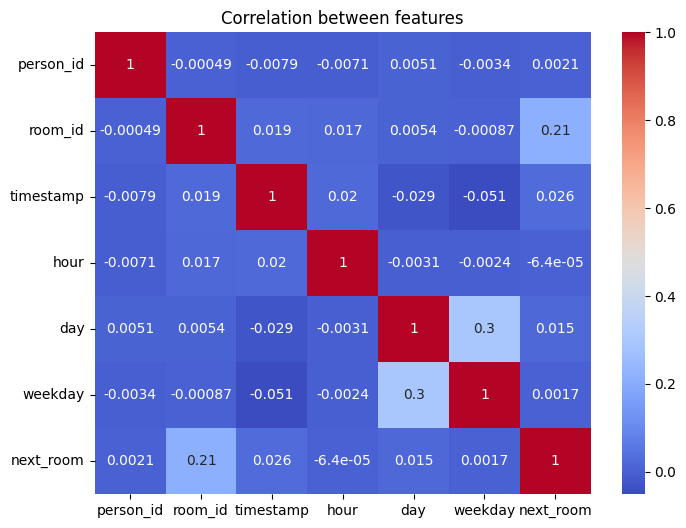

In [ ]:
import matplotlib.pyplot as plt

# Copy data to avoid modifying original
df_corr = data_seq.copy()

# Encode categorical columns as numeric codes
for col in ['person_id', 'room_id', 'next_room']:
    df_corr[col] = df_corr[col].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Display
print(corr_matrix)

# Optional: Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40817 entries, 1 to 43049
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   person_id  40817 non-null  object        
 1   room_id    40817 non-null  object        
 2   timestamp  40817 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder

# 1. Prepare features and target
X = data_seq[['person_id', 'hour', 'day', 'weekday', 'room_id']].copy()
y = data_seq['next_room'].copy()

# Encode categorical features
le_person = LabelEncoder()
X['person_id'] = le_person.fit_transform(X['person_id'])

le_room = LabelEncoder()
X['room_id'] = le_room.fit_transform(X['room_id'])
y_encoded = le_room.fit_transform(y)  # same label encoder can be used for target if needed

# 2. Perform oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y_encoded)

# 3. Check class distribution after oversampling
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(2905), np.int64(1): np.int64(2905), np.int64(2): np.int64(2905), np.int64(3): np.int64(2905), np.int64(4): np.int64(2905), np.int64(5): np.int64(2905), np.int64(6): np.int64(2905), np.int64(7): np.int64(2905), np.int64(8): np.int64(2905), np.int64(9): np.int64(2905), np.int64(10): np.int64(2905), np.int64(11): np.int64(2905), np.int64(12): np.int64(2905), np.int64(13): np.int64(2905), np.int64(14): np.int64(2905), np.int64(15): np.int64(2905), np.int64(16): np.int64(2905), np.int64(17): np.int64(2905), np.int64(18): np.int64(2905), np.int64(19): np.int64(2905), np.int64(20): np.int64(2905), np.int64(21): np.int64(2905), np.int64(22): np.int64(2905), np.int64(23): np.int64(2905), np.int64(24): np.int64(2905), np.int64(25): np.int64(2905), np.int64(26): np.int64(2905), np.int64(27): np.int64(2905), np.int64(28): np.int64(2905), np.int64(29): np.int64(2905), np.int64(30): np.int64(2905), np.int64(31): np.int64(2905), np.int64(32): np.int64(2905), np.int64(33): np.in

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

# -----------------------------
# 1. Prepare features and target
# -----------------------------
X = data_seq[['person_id', 'hour', 'day', 'weekday', 'room_id']].copy()
y = data_seq['next_room'].copy()

# Encode categorical features
le_person = LabelEncoder()
X['person_id'] = le_person.fit_transform(X['person_id'])

le_room = LabelEncoder()
X['room_id'] = le_room.fit_transform(X['room_id'])
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# -----------------------------
# 2. Oversample to balance target classes
# -----------------------------
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y_encoded)

# -----------------------------
# 3. Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# -----------------------------
# 4. Feature scaling (optional for tree-based models)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 5. Train a classifier
# -----------------------------
clf = RandomForestClassifier(
    n_estimators=200, random_state=42, n_jobs=-1
)
clf.fit(X_train_scaled, y_train)

# -----------------------------
# 6. Evaluate
# -----------------------------
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test, target_names=le_target.classes_))


Train Accuracy: 0.9971477747725597
Test Accuracy: 0.8484878288664863

Classification Report:
               precision    recall  f1-score   support

     ADMIN_1       0.93      1.00      0.96       581
     ADMIN_2       0.91      1.00      0.95       581
     ADMIN_3       0.91      1.00      0.95       581
     ADMIN_4       0.90      1.00      0.95       581
     ADMIN_5       0.90      0.99      0.95       581
       AUD_1       0.87      0.95      0.91       581
       AUD_2       0.82      0.94      0.88       581
       AUD_3       0.84      0.91      0.87       581
       AUD_4       0.84      0.96      0.89       581
       AUD_5       0.87      0.94      0.90       581
         CAF       0.61      0.44      0.51       581
         ENG       0.85      0.92      0.89       581
         GYM       0.80      0.83      0.81       581
    HOSTEL_1       0.89      1.00      0.94       581
    HOSTEL_2       0.90      1.00      0.95       581
    HOSTEL_3       0.91      1.00      0.

In [ ]:
# Convert numerical predictions back to original room names
predicted_room_names = le_target.inverse_transform(y_pred_test)

# Display the first few predicted room names
print(predicted_room_names[:10])

['LIB_1' 'LAB_4' 'HOSTEL_1' 'LIB_4' 'LIB_5' 'LAB_1' 'ADMIN_3' 'AUD_4'
 'LAB_4' 'HOSTEL_3']


In [ ]:
print("Shape of predicted output (y_pred_test):", y_pred_test.shape)

Shape of predicted output (y_pred_test): (20335,)


In [ ]:
print("Shape of features after oversampling (X_resampled):", X_resampled.shape)
print("Shape of target after oversampling (y_resampled):", y_resampled.shape)

Shape of features after oversampling (X_resampled): (101675, 5)
Shape of target after oversampling (y_resampled): (101675,)


In [ ]:
y_pred_test.shape

(20335,)

In [ ]:
print(y_pred_test)

[26 24 13 ...  9 15 29]


In [ ]:
# Example manual input data
manual_input = pd.DataFrame({
    'person_id': ['S14165', 'S13478'],  # Example person IDs
    'hour': [9, 14],                   # Example hours
    'day': [25, 26],                   # Example days
    'weekday': [1, 2],                 # Example weekdays (Monday=0, Tuesday=1, etc.)
    'room_id': ['HOSTEL_5', 'LIB_ENT']   # Example current rooms
})

# Ensure the column order matches the training data features
manual_input = manual_input[['person_id', 'hour', 'day', 'weekday', 'room_id']]

# Encode categorical features using the same encoders fitted on the training data
manual_input['person_id'] = le_person.transform(manual_input['person_id'])
manual_input['room_id'] = le_room.transform(manual_input['room_id'])

# Scale the features using the same scaler fitted on the training data
manual_input_scaled = scaler.transform(manual_input)

# Make predictions
manual_predictions_encoded = clf.predict(manual_input_scaled)

# Convert numerical predictions back to original room names
manual_predictions_room_names = le_target.inverse_transform(manual_predictions_encoded)

# Display the predictions
print("Manual Input:")
display(manual_input)
print("\nPredicted Next Room(s):")
print(manual_predictions_room_names)

Manual Input:


,person_id,hour,day,weekday,room_id
0,259,9,25,1,17
1,214,14,26,2,31



Predicted Next Room(s):
['LIB_ENT' 'LIB_5']


In [ ]:
import joblib

# Save the trained model
joblib.dump(clf, 'random_forest_model.joblib')

# Save the target label encoder
joblib.dump(le_target, 'room_label_encoder.joblib')

print("Model and label encoder saved successfully.")

Model and label encoder saved successfully.
